## Importing required packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

%matplotlib inline

## Convolution Function

In [2]:
def Conv2D(image, kernel, padding, strides):
  # shapes of kernel + image + padding
  (xDim, yDim) = image.shape[:2]
  (xKernel, yKernel) = kernel.shape[:2]

  # apply padding to the image
  if padding != 0:
    image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value = 0)

  # calculate the output dimension
  xOut = int(((xDim - xKernel + 2 * padding) / strides) + 1)
  yOut = int(((yDim - yKernel + 2 * padding) / strides) + 1)
  output = np.zeros((xOut, yOut))

  # perform the convolution operation
  for y in range(0, yDim, strides):
    if y + yKernel > yDim + padding * 2:
      break
    for x in range(0, xDim, strides):
      if x + xKernel > xDim + padding * 2:
        break
      output[int(x/strides), int(y/strides)] = (kernel * image[x:x + xKernel, y:y + yKernel]).sum()

  return output

## ReLU Activation Function

In [3]:
def relu(feature_map):
  return np.maximum(0, feature_map)

## Max Pooling

In [4]:
def maxPooling(feature_map, size, stride):

  # calculate ouput dimensions
  xOut = int(((feature_map.shape[0] - size) / stride) + 1)
  yOut = int(((feature_map.shape[1] - size) / stride) + 1)
  output = np.zeros((xOut, yOut))

  # perform pooling operation
  for y in range(0, feature_map.shape[1], stride):
    if y + size > feature_map.shape[1]:
      break
    for x in range(0, feature_map.shape[0], stride):
      if x + size > feature_map.shape[0]:
        break
      output[int(x/stride), int(y/stride)] = np.max(feature_map[x:x+size, y:y+size])

  return output

## Creating Kernels

Some common filters are:

1. **Horizontal Filter**: This filter detects horizontal edges in an image. It highlights transitions from dark to light regions in the horizontal direction.

$$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$

2. **Vertical Filter**: This filter detects vertical edges in an image. It highlights transitions from dark to light regions in the vertical direction.

$$
\begin{bmatrix}
1 & 1 & 1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix}
$$

3. **Sharpen Filter**: This filter enhances the edges in an image. It increases the contrast of adjacent pixels to make edges more pronounced.

$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

4. **Blur Filter**: This filter smooths the image by averaging the pixel values within the kernel. It reduces noise and detail in the image.

$$
\begin{bmatrix}
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
\frac{1}{9} & \frac{1}{9} & \frac{1}{9}
\end{bmatrix}
$$


In [5]:
# creating Blur filter
blur_filter = np.ones((3,3), dtype='float') * (1.0 / (3*3))

# creating Sharpen filter
sharpen_filter = np.array((
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]), dtype='int')

# creating Horizontal filter
horizontal_filter = np.array((
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]), dtype='int')

# creating Vertical filter
vertical_filter = np.array((
    [1,   1,  1],
    [0,   0,  0],
    [-1, -1, -1]), dtype='int')

In [6]:
kernels = [
            ("blur", blur_filter),
            ("sharpen", sharpen_filter),
            ("horizontal", horizontal_filter),
            ("vertical", vertical_filter)
          ]

## Apply convolution to sample image

In [7]:
image = cv2.imread('sample_image.jpg', cv2.IMREAD_GRAYSCALE)

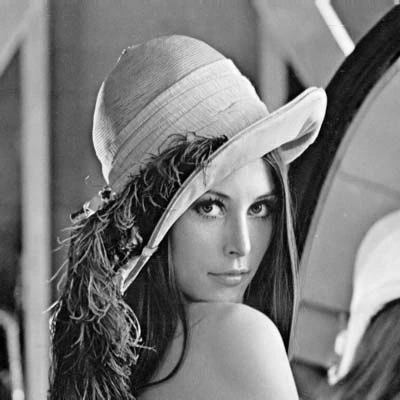

In [8]:
cv2_imshow(image)

## Visualizing Convolution Operations

Applying blur kernel


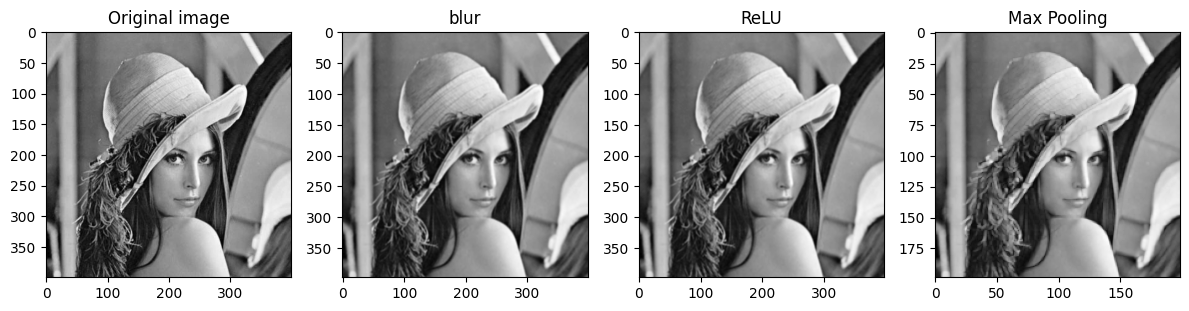

Applying sharpen kernel


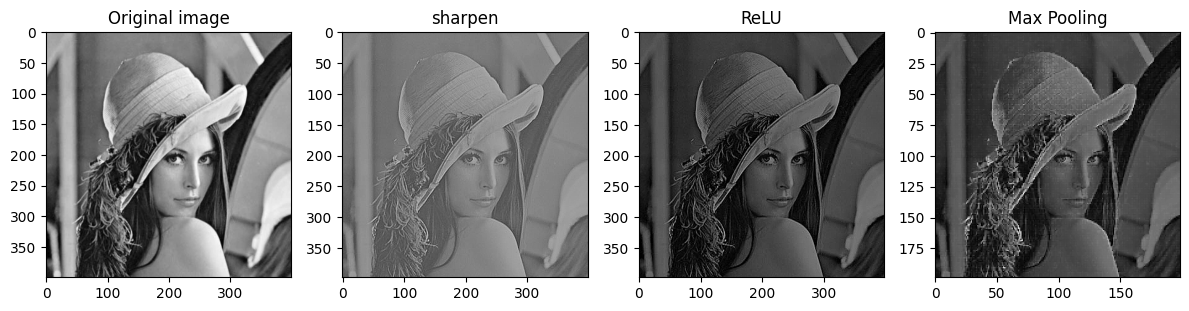

Applying horizontal kernel


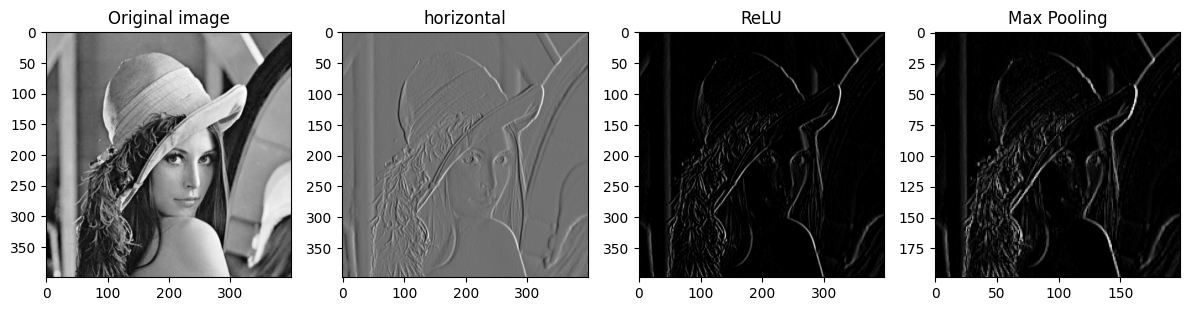

Applying vertical kernel


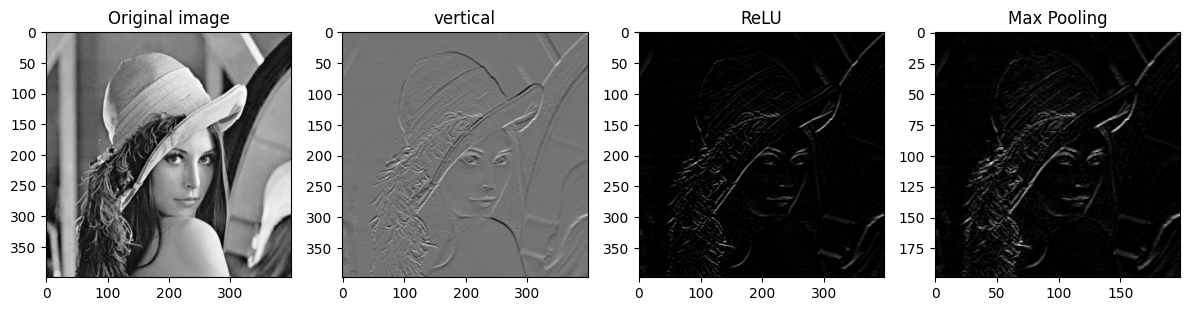

In [9]:
for (kernel, k) in kernels:
  print(f"Applying {kernel} kernel")

  output = Conv2D(image, kernel=k, padding=0, strides=1)
  activation = relu(output)
  pool = maxPooling(activation, size=2, stride=2)

  f, ax = plt.subplots(1, 4, figsize=(12, 12))
  ax[0].imshow(image, cmap='gray')
  ax[0].set_title("Original image")

  ax[1].imshow(output, cmap='gray')
  ax[1].set_title(kernel)

  ax[2].imshow(activation, cmap='gray')
  ax[2].set_title("ReLU")

  ax[3].imshow(pool, cmap='gray')
  ax[3].set_title("Max Pooling")

  plt.tight_layout()
  plt.show()

In the above example, we demonstrated the operational mechanics of various functions within a convolution block (Conv-Block) and their imapct on image. Specifically, we visualized the transformations resulting from each function in the Conv-Block, illustrating how forward propagation is executed using predefined filters.